# Milestone 1 - Data Visualization Complementary Views 

## Author - Dustin Burnham



## Instructions
1. Create different complementary views of data by applying multiple chart types and aesthetics.
2. Project multiple dimensions using conditioning or faceting (e.g., small multiples) on both categorical and numeric variables.

In [1]:
# Load necessary libraries
%matplotlib inline
from pandas.plotting import scatter_matrix
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [2]:
# Load data
filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/JitteredHeadCount.csv'
headcount_df = pd.read_csv(filename)

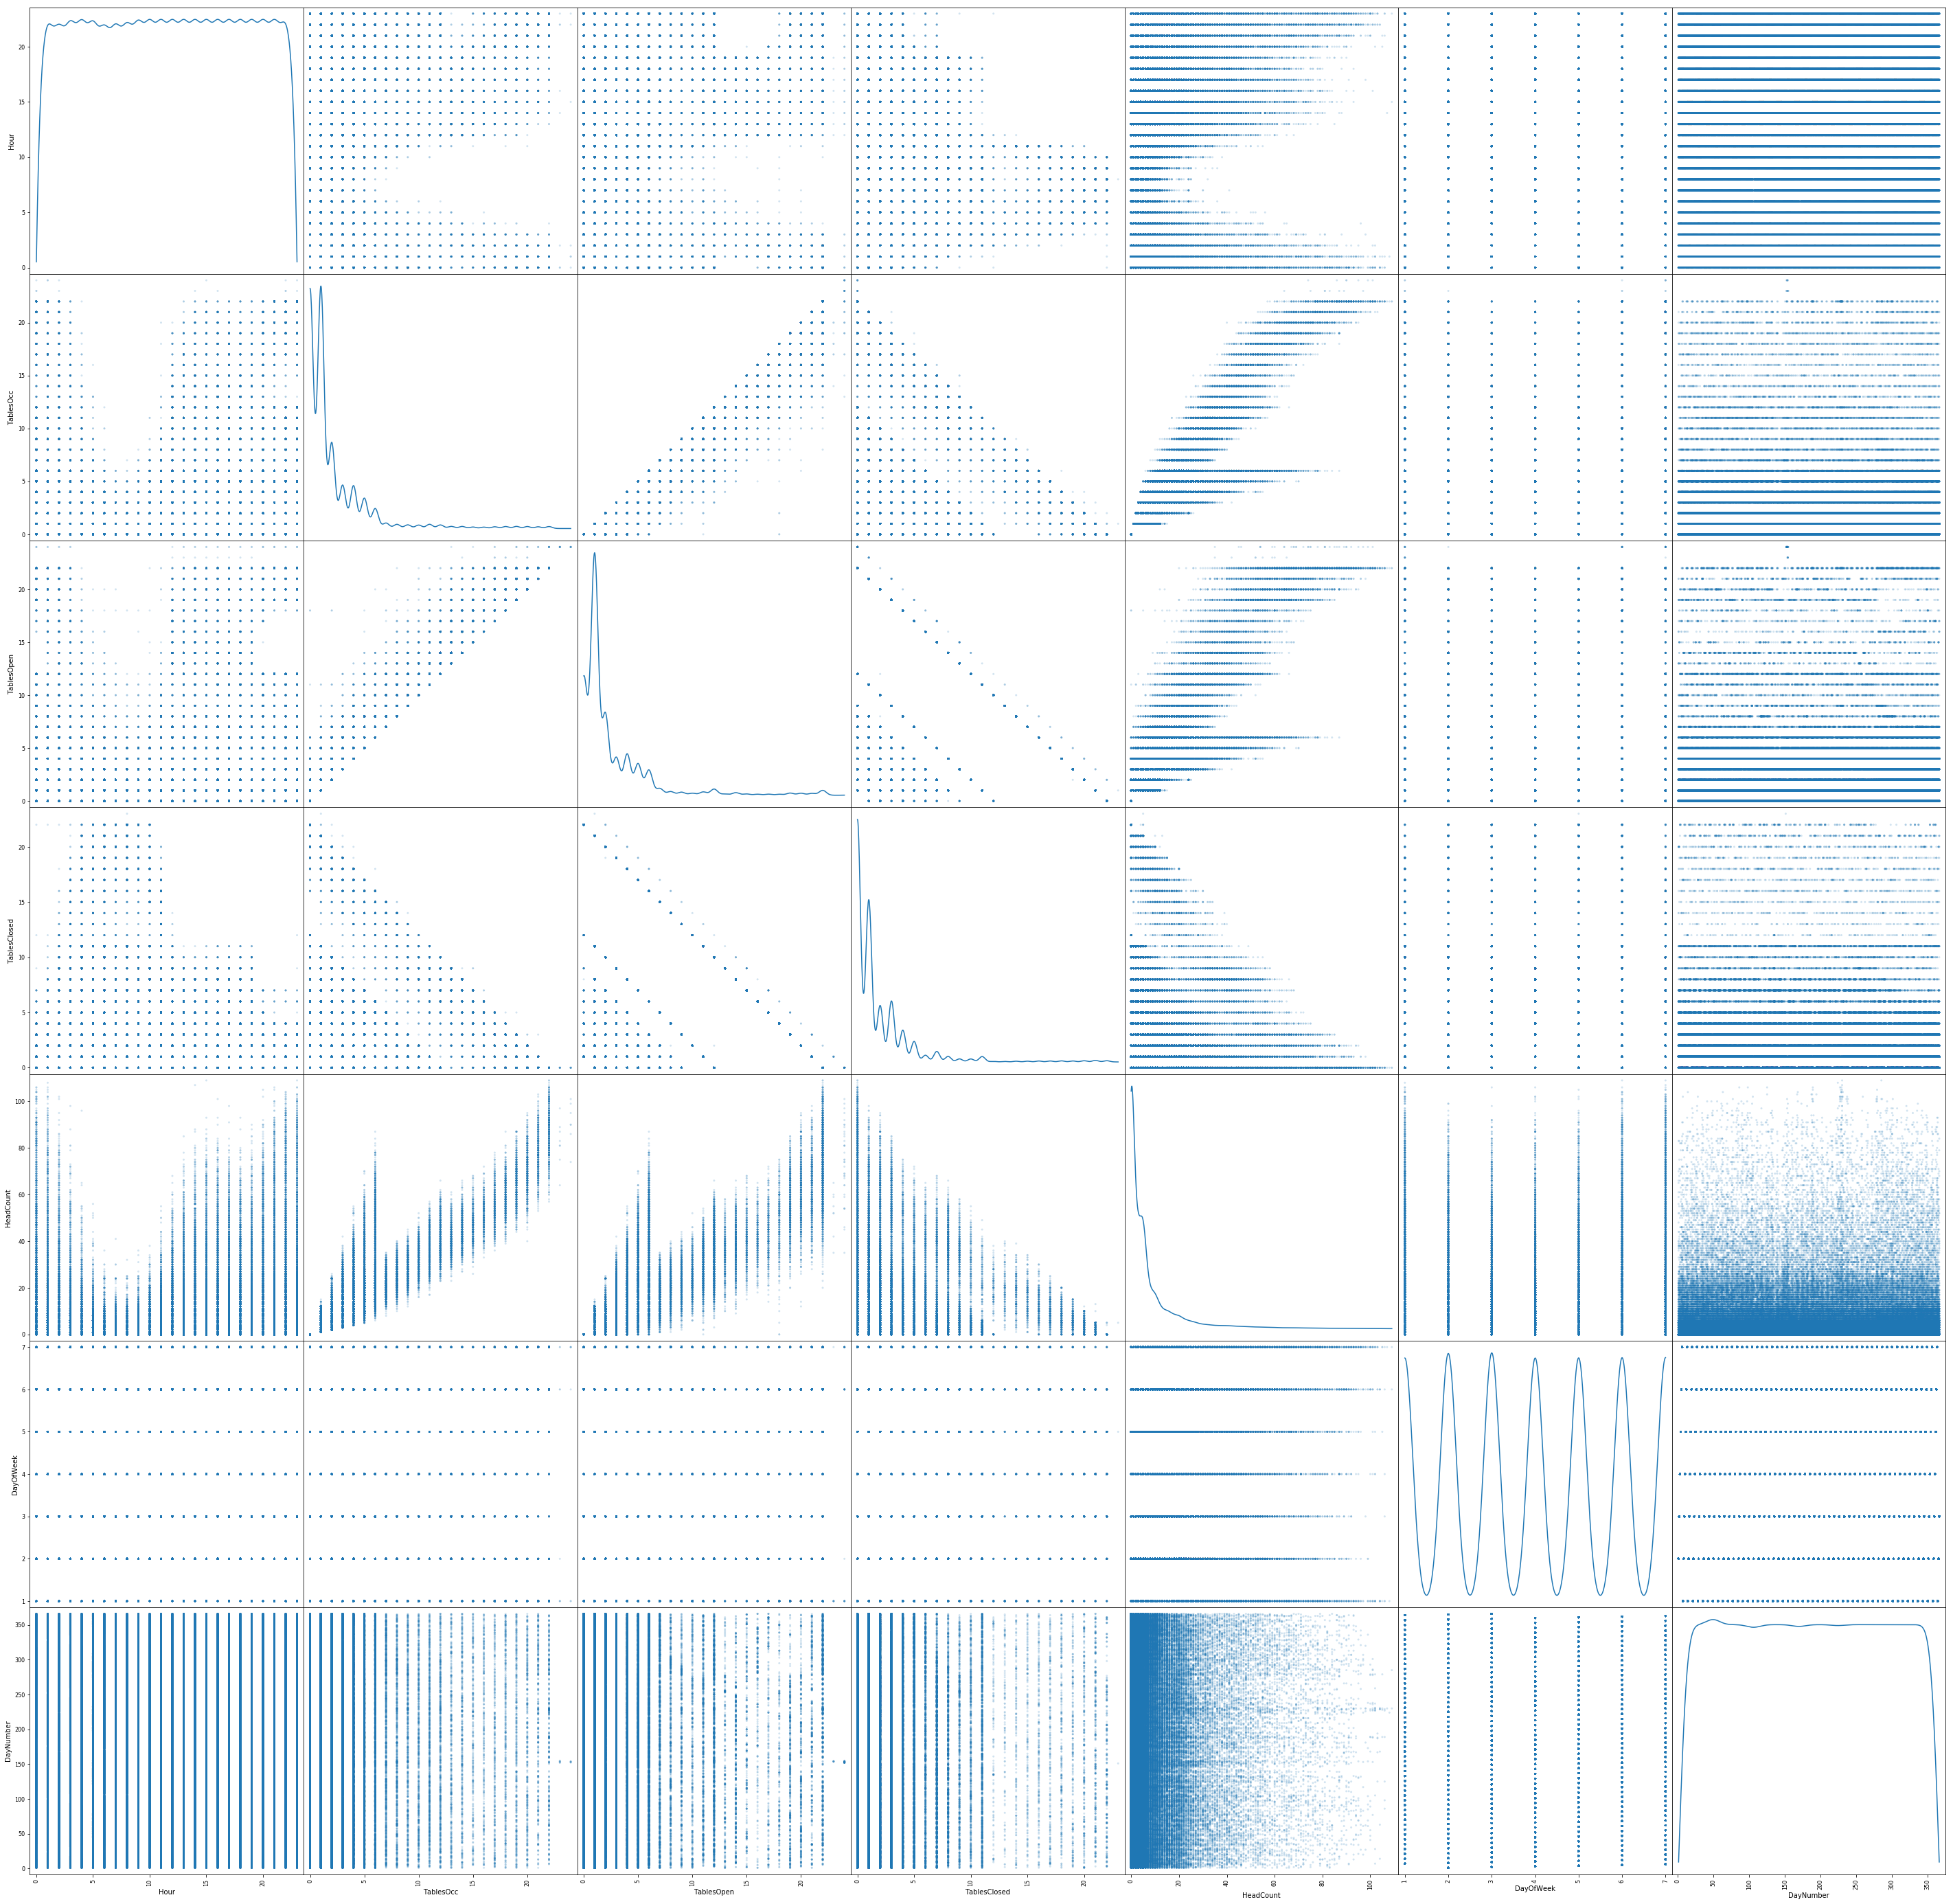

In [3]:
# Check out the relationships between all variables
scatter_matrix(headcount_df, alpha=0.2, figsize=(50, 50), diagonal='kde')
plt.show()

Thoughts:
1.  Time of day and head count
2.  Head count, occupied tables, day of week color
3.  Type of game, pair wise scatter plots

# 1.  Hour vs. Head Count

In [4]:
# Get numeric columns
numeric_cols = headcount_df.columns[2:]

In [5]:
# Check out bottom of dataframe for weirdness.
headcount_df.tail()

,GameCode,DateFormat,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
175672,WR,10/31/2011,19,0,0,1,0,2,92
175673,WR,10/31/2011,20,1,1,0,1,2,92
175674,WR,10/31/2011,21,0,1,0,0,2,92
175675,WR,10/31/2011,22,1,1,0,1,2,92
175676,WR,10/31/2011,23,0,1,0,0,2,92


Text(0.5,1,'Head Count vs Hour')

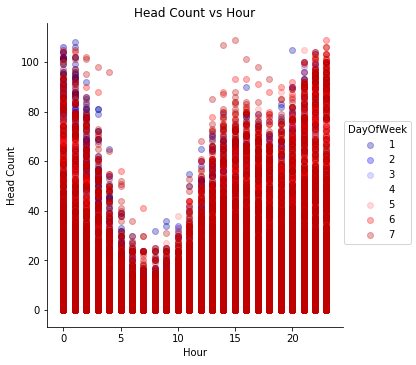

In [6]:
# Plotting
sns.lmplot(x = 'Hour', y = 'HeadCount', 
           data = headcount_df, 
           hue = "DayOfWeek", 
           palette="seismic", 
           scatter_kws={'alpha':0.3},
           fit_reg = False)
plt.xlabel('Hour')
plt.ylabel('Head Count')
plt.title('Head Count vs Hour')

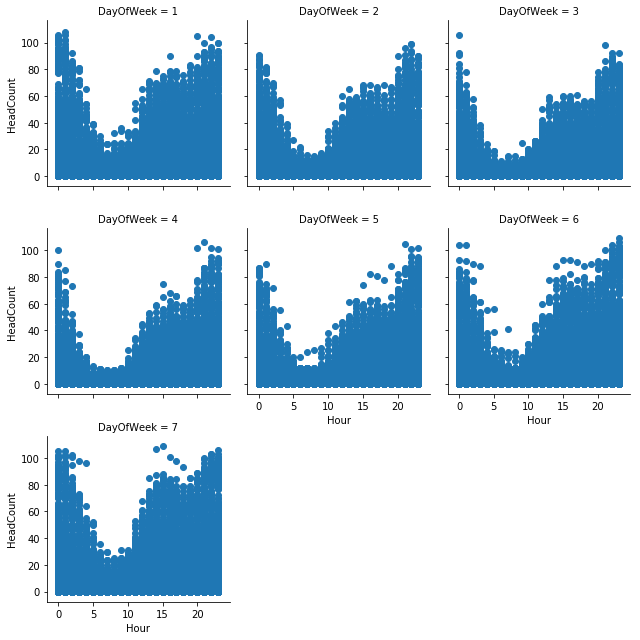

In [7]:
# Plot headcount vs hour for each day of the week.
gr = sns.FacetGrid(headcount_df, col='DayOfWeek', col_wrap=3)
gr = gr.map(plt.scatter, 'Hour', 'HeadCount')

### Summary 1:
The relationship between hour and headcount follows what we should expect at a casino.  There is a large dip in the late morning, and most visitors attend in the evening.  I was curious of how day of week would change this relationship.  I first tried using day of week as a color, but that was not so helpful, so I used a facet grid to create a scatter plot of headcount vs hour for each day of the week.  The results are interesting.  I thought we would see a difference between work days and weekend days.  The relationship stays consistent, but the peaks and valleys are more extreme depending on the day of the week.

# 2.  Head count, occupied tables, day of week

Text(0.5,1,'Head Count vs Hour')

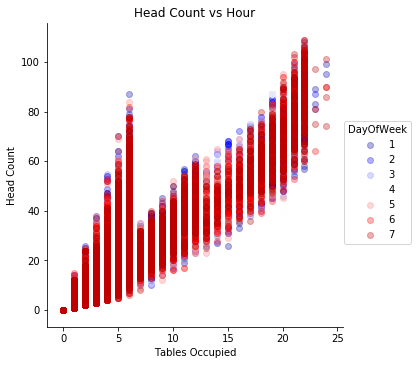

In [8]:
# Plot headcount vs tables occupied
sns.lmplot(x = 'TablesOcc', y = 'HeadCount', 
           data = headcount_df, 
           hue = "DayOfWeek", 
           palette="seismic", 
           scatter_kws={'alpha':0.3},
           fit_reg = False)
plt.xlabel('Tables Occupied')
plt.ylabel('Head Count')
plt.title('Head Count vs Hour')

## Summary 2:
The next relationship I wanted to investigate was the relationship between whether a table was occupied and the overall headcount.  I expected these two variables to be positively correlated and to investigate I decided to use a seaborn scatter plot.  The results were surprising.  There is a spike in head counts for lower table occupied.  A possible next step would be to investigate the type of event at the casino that would lead to this spike in head count.

# 3.  Type of game, day of week, day of year?

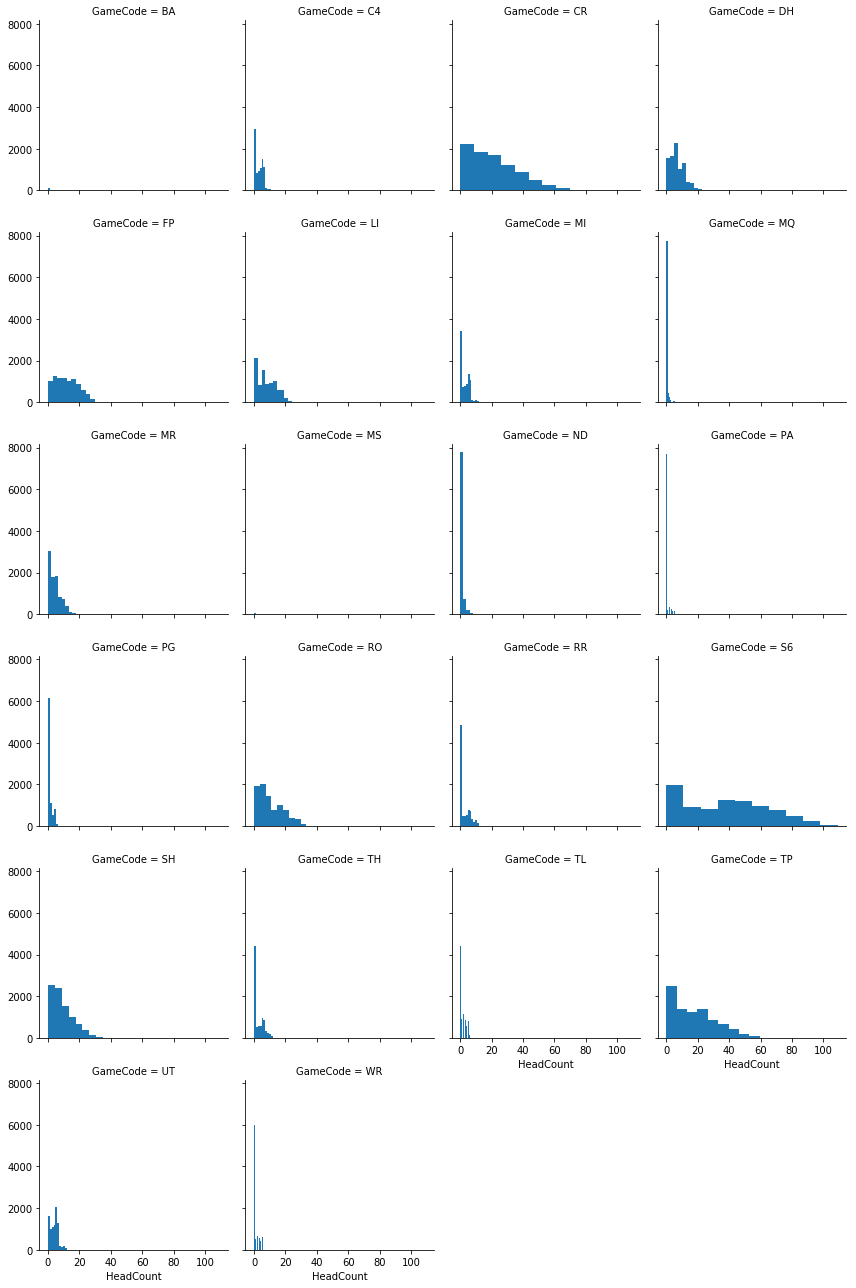

In [9]:
# Headcount for each type of game
g = sns.FacetGrid(headcount_df, col="GameCode", col_wrap=4)
g = g.map(plt.hist, "HeadCount")

In [10]:
# Pick numeric columns for interesting games.
s6_dat = headcount_df.loc[(headcount_df['GameCode'] == 'S6'),numeric_cols]
sh_dat = headcount_df.loc[(headcount_df['GameCode'] == 'SH'),numeric_cols]

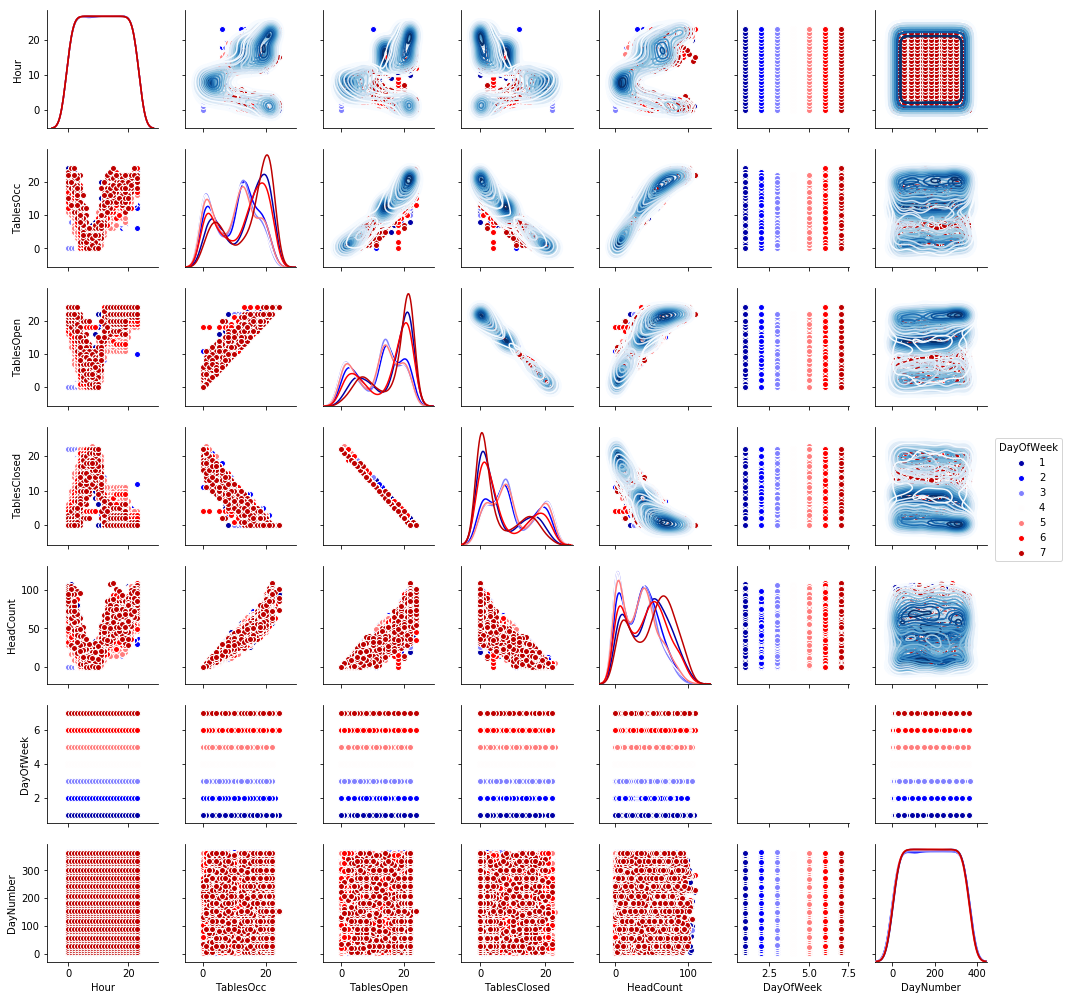

In [11]:
# Plotting game s6
warnings.simplefilter('ignore')
sns.pairplot(s6_dat, hue='DayOfWeek', 
             palette="seismic", diag_kind="kde", 
             size=2).map_upper(sns.kdeplot, cmap="Blues")
warnings.simplefilter('ignore')

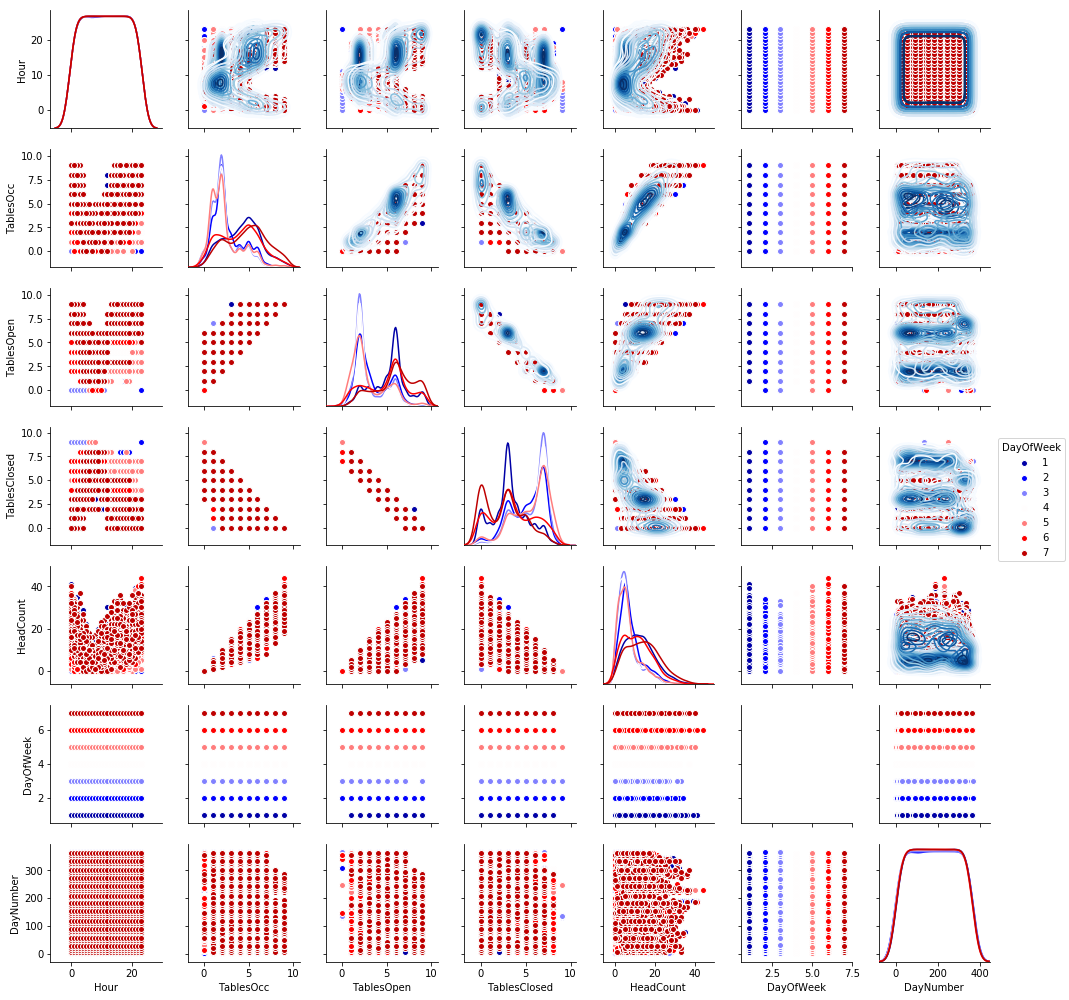

In [12]:
# Plotting sh
warnings.simplefilter('ignore')
sns.pairplot(sh_dat, hue='DayOfWeek', 
             palette="seismic", diag_kind="kde", 
             size=2).map_upper(sns.kdeplot, cmap="Blues")
warnings.simplefilter('ignore')

## Summary 3:
The next inveatigation was about how the variables might change in their relationship depending on the type of game at that table.  To begin I made a facet plot to look at the histograms of headcount separated by game type.  I picked two interesting distributions, sh and s6 game types, which appeared to be different enough to warrent further investigation.  Next I made pair wise scatter plots for these two game types for comparison.  The relationships for s6 are much more concise than sh.  As a result, the relationships when looking at the entire data set is more strongly influenced by different games.  The s6 relationships more reflect the relationships for the entire data set.  For example comparing the headcount vs hour for the two games with the plot in part 1.